# **Machine Learning Assignment - 1002248611**

# Implementation of the LinearRegression class

In [406]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Converting the Dataset into a DataFrame

In [407]:
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()
#Convert to datafreame
df=pd.DataFrame(iris.data , columns = iris.feature_names)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [408]:
class LinearRegression:
    def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Initialize a linear regression model."""
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.loss_history = []
        self.average_loss_batch = []

    def fit(self, X, y, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Fit the linear regression model to the data."""

        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience

        num_samples, num_features= X.shape

        self.weights = np.zeros((num_features,1))
        self.bias = 0

        # Spiltting into training and validation
        # Split data into train/validation (90%/10%)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


        best_loss = float('inf')
        epochs_without_improvement = 0

        for epoch in range(max_epochs):
         indices = np.arange(X_train.shape[0])
         np.random.shuffle(indices)
         X_shuffled = X_train[indices]
         y_shuffled = y_train[indices]

         for i in range(0, num_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size] #values
            y_batch = y_shuffled[i:i+batch_size] #what you predict

            y_predictions = X_batch @ self.weights+self.bias #where we compute gradients
            errors = y_predictions - y_batch.reshape(-1,1)
            mse = np.sum(errors ** 2)/batch_size
            self._record_loss (mse) #records batch_loss

            temp_weights = (2) * X_batch.T @ errors / batch_size + self.regularization * self.weights
            temp_bias = (2) * np.sum(errors)/ batch_size

            self.weights = self.weights-0.0001* temp_weights #here keeping learning rate as 0.0001
            self.bias = self.bias-0.0001* temp_bias


         val_predictions = X_val @ self.weights + self.bias
         val_loss = np.mean((val_predictions - y_val) ** 2)

         self.loss_history.append(val_loss)
         if val_loss < best_loss:
           best_loss = val_loss

           best_W = self.weights.copy()
           best_B = self.bias
           epochs_without_improvement = 0
         else:
           epochs_without_improvement += 1

         if epochs_without_improvement >= patience:
           print("Stopping Early!!")
           print(f"At Epoch {epoch+1},validation loss : {val_loss:4f}")
           break
         #print(f"At Epoch {epoch+1},validation loss : {val_loss:4f}")

         self.weights = best_W
         self.bias = best_B


    def _record_loss(self,mse):
        self.average_loss_batch.append(mse)
        #average_loss_batch=model.average_loss_batch
        #print (average_loss_batch)

    def predict(self, X):
        """Predict using the linear model."""

        return X @ self.weights + self.bias


    def score(self, X, y):
        """Evaluate the linear model using the mean squared error."""

        y_pred=self.predict(X)
        return np.mean((y_pred - y)**2)


    def save (self,filepath):
      np.savez(filepath, w = self.weights, b=self.bias)

    def load(self,filepath):
      data=np.load(filepath)
      self.weights=data['w']
      self.bias=data['b']



## train_regression1.py

Stopping Early!!
At Epoch 64,validation loss : 0.528461
Model 1 - Best Validation Loss: 0.5284

Weights for Model 1:
[[0.11164842]
 [0.04467869]
 [0.10757232]]

Bias for Model 1: 0.016140678917650104



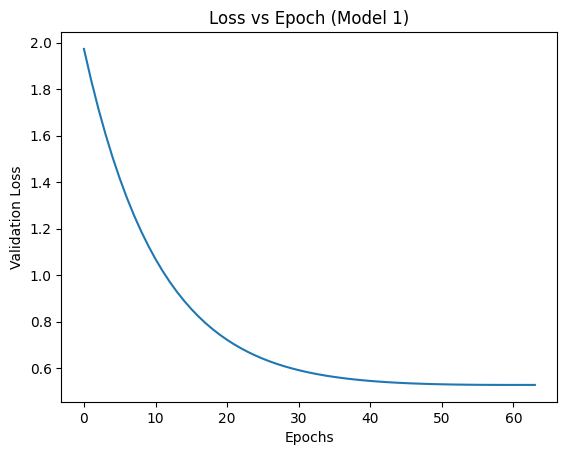

In [409]:
import matplotlib.pyplot as plt

# Define features and target for Model 1
X = df[["sepal length (cm)","sepal width (cm)", "petal length (cm)"]].values
y = df["petal width (cm)"].values

# Split dataset into training and testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the Linear Regression model
model1 = LinearRegression()
model1.fit(X_train1, y_train1, batch_size=32, regularization=0, max_epochs=100, patience=3)

# Evaluate the model
#mse = model1.score(X_test1, y_test1)
#print(f"Mean Squared Error: {mse:.4f}\n")

# Retrieve the lowest validation loss from training history
best_loss = min(model1.loss_history) if model1.loss_history else None
print(f"Model 1 - Best Validation Loss: {best_loss:.4f}\n" if best_loss else "Validation loss history is empty.\n")

# Display other model parameters
#print(f"Average Loss for Model 1: {model1.average_loss_batch}\n")
print(f"Weights for Model 1:\n{model1.weights}\n")
print(f"Bias for Model 1: {model1.bias}\n")

# Plot the loss curve over epochs
plt.plot(model1.loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Loss vs Epoch (Model 1)')
plt.show()


## train_regression2.py

Average Loss for Model 2: [36.150625000000005, 34.69576295723185, 35.60000166276701, 23.653174362050777, 0.0, 35.11840316613523, 32.533475674951625, 32.91881408953776, 25.96780519442254, 0.0, 32.47921109603408, 34.44551298128977, 32.59742328983741, 23.59234848618546, 0.0, 31.41107213776096, 31.609828186926393, 30.90945047711029, 25.846522935351633, 0.0, 30.48806766185763, 29.487990708076577, 32.457071246101826, 24.12312212076702, 0.0, 32.59378016861942, 29.983502197654502, 28.14376737679686, 22.720548458900566, 0.0, 29.52579134657405, 28.90430393319822, 29.59021318094704, 22.382764816064345, 0.0, 27.690877448211957, 28.326395557638456, 28.67680414539372, 22.77582936942814, 0.0, 27.717703190140746, 27.284657526580702, 28.833008573110735, 20.799053421351832, 0.0, 28.34274284098055, 26.994636285969342, 27.40107607320552, 19.144841432715367, 0.0, 27.335775751803222, 26.03476447965585, 26.02993237318241, 19.80672412620337, 0.0, 25.139071430524343, 26.06305020024825, 25.103533494392078, 20.3

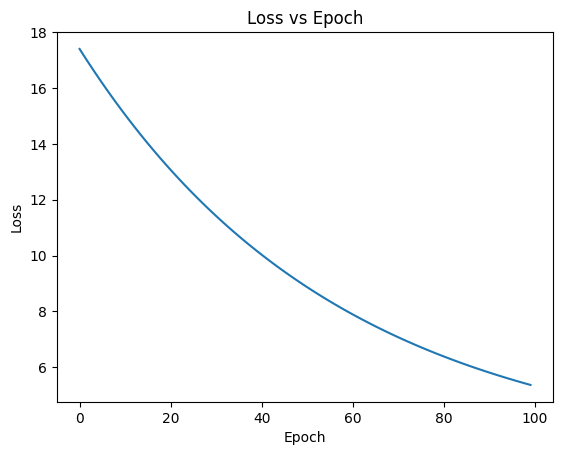

In [410]:
#Model 2


import matplotlib.pyplot as plt

X2 = df[["sepal width (cm)","petal width (cm)"]].values
y2 = df["petal length (cm)"].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=42)
# Linear Regression Instance
model2 = LinearRegression()

# Training the model
model2.fit(X_train2, y_train2, batch_size=32, regularization=0, max_epochs=100, patience=3)


# Evaluating the model
# mse2 = model2.score(X_test2, y_test2)
# print(f"Mean Squared Error: {mse2}\n")


#average_loss_batch=model2.average_loss_batch
print (f"Average Loss for Model 2: {average_loss_batch} \n")


weights=model2.weights
print (f"Weights for Model 2: {weights} \n")

bias=model2.bias
print (f"Bias for Model 2: {bias} \n")

# Retrieve the lowest validation loss from training history
best_loss = min(model2.loss_history) if model2.loss_history else None
print(f"Model 2 - Best Validation Loss: {best_loss:.4f}\n" if best_loss else "Validation loss history is empty.\n")

plt.plot(model2.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

## train_regression3.py

Average Loss for Model 3: [36.150625000000005, 34.69576295723185, 35.60000166276701, 23.653174362050777, 0.0, 35.11840316613523, 32.533475674951625, 32.91881408953776, 25.96780519442254, 0.0, 32.47921109603408, 34.44551298128977, 32.59742328983741, 23.59234848618546, 0.0, 31.41107213776096, 31.609828186926393, 30.90945047711029, 25.846522935351633, 0.0, 30.48806766185763, 29.487990708076577, 32.457071246101826, 24.12312212076702, 0.0, 32.59378016861942, 29.983502197654502, 28.14376737679686, 22.720548458900566, 0.0, 29.52579134657405, 28.90430393319822, 29.59021318094704, 22.382764816064345, 0.0, 27.690877448211957, 28.326395557638456, 28.67680414539372, 22.77582936942814, 0.0, 27.717703190140746, 27.284657526580702, 28.833008573110735, 20.799053421351832, 0.0, 28.34274284098055, 26.994636285969342, 27.40107607320552, 19.144841432715367, 0.0, 27.335775751803222, 26.03476447965585, 26.02993237318241, 19.80672412620337, 0.0, 25.139071430524343, 26.06305020024825, 25.103533494392078, 20.3

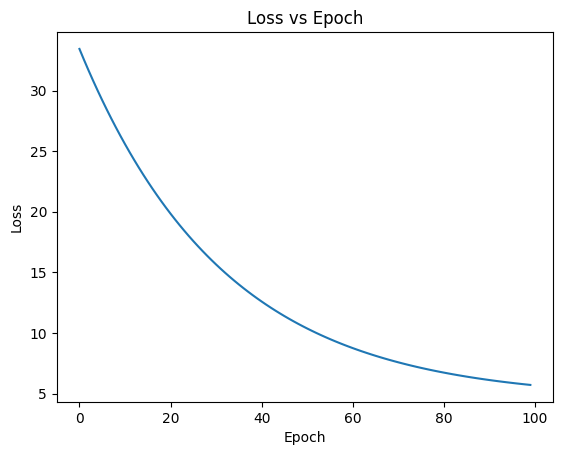

In [411]:
#Model 3


import matplotlib.pyplot as plt

X3 = df[["petal length (cm)","petal width (cm)"]].values
y3 = df["sepal length (cm)"].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.1, random_state=42)
# Linear Regression Instance
model3 = LinearRegression()

# Training the model
model3.fit(X_train3, y_train3, batch_size=32, regularization=0, max_epochs=100, patience=3)


# Evaluating the model
# mse3 = model3.score(X_test3, y_test3)
# print(f"Mean Squared Error: {mse3}\n")

#average_loss_batch=model3.average_loss_batch
print (f"Average Loss for Model 3: {average_loss_batch} \n")


weights=model3.weights
print (f"Weights for Model 3: {weights} \n")

bias=model3.bias
print (f"Bias for Model 3: {bias} \n")

# Retrieve the lowest validation loss from training history
best_loss = min(model3.loss_history) if model3.loss_history else None
print(f"Model 1 - Best Validation Loss: {best_loss:.4f}\n" if best_loss else "Validation loss history is empty.\n")


plt.plot(model3.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

## train_regression4.py

Average Loss for Model 4: [36.150625000000005, 34.69576295723185, 35.60000166276701, 23.653174362050777, 0.0, 35.11840316613523, 32.533475674951625, 32.91881408953776, 25.96780519442254, 0.0, 32.47921109603408, 34.44551298128977, 32.59742328983741, 23.59234848618546, 0.0, 31.41107213776096, 31.609828186926393, 30.90945047711029, 25.846522935351633, 0.0, 30.48806766185763, 29.487990708076577, 32.457071246101826, 24.12312212076702, 0.0, 32.59378016861942, 29.983502197654502, 28.14376737679686, 22.720548458900566, 0.0, 29.52579134657405, 28.90430393319822, 29.59021318094704, 22.382764816064345, 0.0, 27.690877448211957, 28.326395557638456, 28.67680414539372, 22.77582936942814, 0.0, 27.717703190140746, 27.284657526580702, 28.833008573110735, 20.799053421351832, 0.0, 28.34274284098055, 26.994636285969342, 27.40107607320552, 19.144841432715367, 0.0, 27.335775751803222, 26.03476447965585, 26.02993237318241, 19.80672412620337, 0.0, 25.139071430524343, 26.06305020024825, 25.103533494392078, 20.3

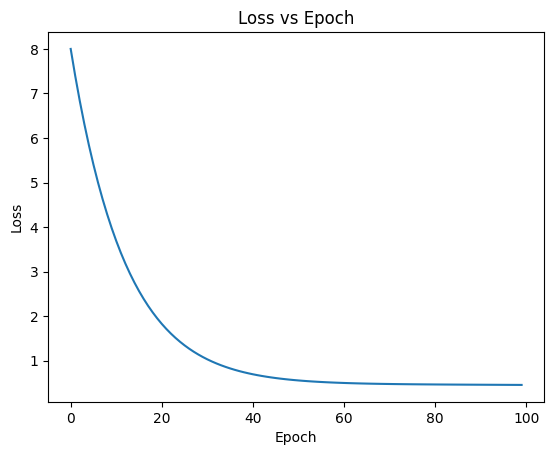

In [412]:
#Model 4


import matplotlib.pyplot as plt

X4 = df[["petal length (cm)","petal width (cm)","sepal length (cm)"]].values
y4 = df["sepal width (cm)"].values

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.1, random_state=42)
# Linear Regression Instance
model4 = LinearRegression()

# Training the model
model4.fit(X_train4, y_train4, batch_size=32, regularization=0, max_epochs=100, patience=3)


# Evaluating the model
# mse4 = model4.score(X_test4, y_test4)
# print(f"Mean Squared Error: {mse4} \n")

#average_loss_batch=model4.average_loss_batch
print (f"Average Loss for Model 4: {average_loss_batch} \n")


weights=model4.weights
print (f"Weights for Model 4: {weights} \n")

bias=model4.bias
print (f"Bias for Model 4: {bias} \n")

# Retrieve the lowest validation loss from training history
best_loss = min(model4.loss_history) if model4.loss_history else None
print(f"Model 1 - Best Validation Loss: {best_loss:.4f}\n" if best_loss else "Validation loss history is empty.\n")


plt.plot(model4.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

Model 1: Predicting Petal Width: Training and Evaluation
Stopping Early!!
At Epoch 64,validation loss : 0.528476
Mean Squared Error for Model 1: Predicting Petal Width: 0.6621

Weights for Model 1: Predicting Petal Width: [[0.11162446]
 [0.04466571]
 [0.10756232]]

Bias for Model 1: Predicting Petal Width: 0.016136501630163315

Model 1: Predicting Petal Width - Best Validation Loss: 0.5285

------------------------------------------------------------------------------------

Model 2: Predicting Petal Length: Training and Evaluation
Mean Squared Error for Model 2: Predicting Petal Length: 4.7350

Weights for Model 2: Predicting Petal Length: [[0.54851509]
 [0.3203965 ]]

Bias for Model 2: Predicting Petal Length: 0.18744029730742426

Model 2: Predicting Petal Length - Best Validation Loss: 5.3600

------------------------------------------------------------------------------------

Model 3: Predicting Sepal Length: Training and Evaluation
Mean Squared Error for Model 3: Predicting Sepal

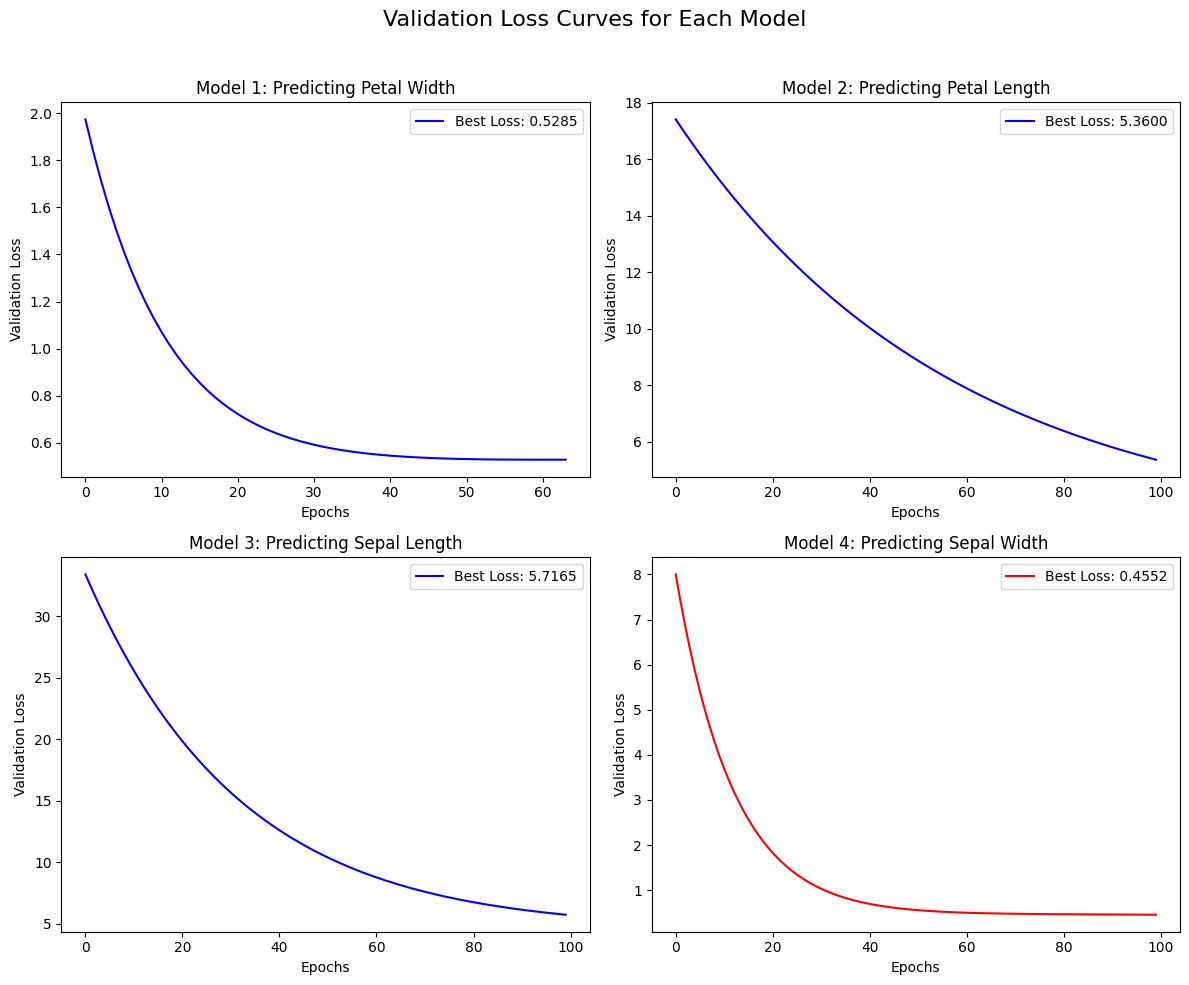

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Define a function to train and evaluate a model
def train_and_evaluate(X, y, model_name):
    print(f"{model_name}: Training and Evaluation")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train, batch_size=32, regularization=0, max_epochs=100, patience=3)

    # Calculate MSE on test data
    mse = model.score(X_test, y_test)

    # Capture the best validation loss from training
    best_loss = min(model.loss_history) if model.loss_history else float('inf')

    # Print results
    print(f"Mean Squared Error for {model_name}: {mse:.4f}\n")
    print(f"Weights for {model_name}: {model.weights}\n")
    print(f"Bias for {model_name}: {model.bias}\n")
    print(f"{model_name} - Best Validation Loss: {best_loss:.4f}\n")
    print("------------------------------------------------------------------------------------\n")

    return model, best_loss

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Define models with different feature-target combinations
models = {
    "Model 1: Predicting Petal Width": (df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']].values, df['petal width (cm)'].values),
    "Model 2: Predicting Petal Length": (df[['sepal width (cm)', 'petal width (cm)']].values, df['petal length (cm)'].values),
    "Model 3: Predicting Sepal Length": (df[['petal length (cm)', 'petal width (cm)']].values, df['sepal length (cm)'].values),
    "Model 4: Predicting Sepal Width": (df[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']].values, df['sepal width (cm)'].values)
}

# Train all models and store results
trained_models = {}
validation_losses = {}

for model_name, (X, y) in models.items():
    model, best_loss = train_and_evaluate(X, y, model_name)
    trained_models[model_name] = model
    validation_losses[model_name] = best_loss  # Store validation loss for each model

# Identify the best model (lowest validation loss)
best_model_name = min(validation_losses, key=validation_losses.get)
print(f"Best Model Based on Validation Loss: {best_model_name}\n")

# Plot loss history for all models in separate charts (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Validation Loss Curves for Each Model', fontsize=16)

for ax, (model_name, model) in zip(axs.flat, trained_models.items()):
    loss_history = model.loss_history
    color = 'red' if model_name == best_model_name else 'blue'
    ax.plot(loss_history, color=color)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Validation Loss')
    ax.set_title(model_name)
    ax.legend([f"Best Loss: {validation_losses[model_name]:.4f}"])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Based on the evaluation of different models using validation loss, Model 4 demonstrates the best performance. Therefore, we will proceed with applying L2 regularization to Model 4 to further refine its performance and enhance generalization.

## train_regularized.py

Model 4: Predicting Sepal Width with L2 Regularization
Best Validation Loss: 0.4545

Weights for Model 4: [[0.16196684]
 [0.35013499]
 [0.04471892]]

Bias for Model 4: 0.06998869411038736



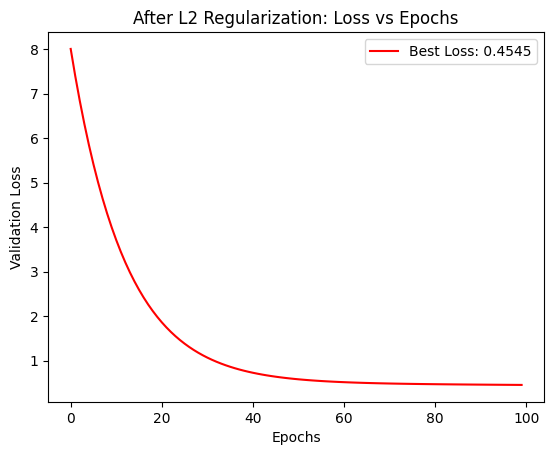

In [414]:
# After L2 regularization
print("Model 4: Predicting Sepal Width with L2 Regularization")

# Separating the features and target
X4 = df[['petal length (cm)', 'sepal length (cm)', 'petal width (cm)']].values  # Convert to NumPy array
y4 = df['sepal width (cm)'].values  # Convert to NumPy array

# Splitting data into training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.1, random_state=42)

# Linear Regression Instance with L2 Regularization
model_4 = LinearRegression()

# Training the model
model_4.fit(X_train4, y_train4, batch_size=32, regularization=2, max_epochs=100, patience=3)

# Extract the best validation loss
best_loss_4 = min(model_4.loss_history) if model_4.loss_history else float('inf')

# Evaluating the model
mse4 = model_4.score(X_test4, y_test4)  # Use test set for evaluation

# Displaying results
#print(f"Mean Squared Error: {mse4:.4f}\n")
print(f"Best Validation Loss: {best_loss_4:.4f}\n")
print(f"Weights for Model 4: {model_4.weights}\n")
print(f"Bias for Model 4: {model_4.bias}\n")

# Plotting loss history
plt.plot(model_4.loss_history, label=f'Best Loss: {best_loss_4:.4f}', color='red')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('After L2 Regularization: Loss vs Epochs')
plt.legend()
plt.show()


### Model 4 performs the best with these parameters

MODEL 4: Evaluating the Impact of L2 Regularization on Sepal Width Prediction



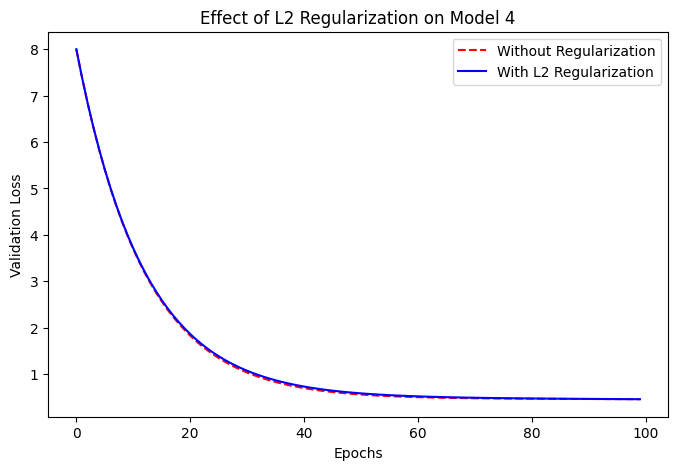

Final Validation Loss (No Regularization): 0.455200
Final Validation Loss (With L2 Regularization): 0.454476

Model 4 Weights Comparison:
Without Regularization:
 [[0.16447792]
 [0.04511507]
 [0.35967506]] 

With L2 Regularization:
 [[0.16196684]
 [0.35013499]
 [0.04471892]] 

Model 4 Bias Comparison:
Bias (No Regularization): 0.067224
Bias (With L2 Regularization): 0.069989



In [415]:
import matplotlib.pyplot as plt

# Display model comparison
print("MODEL 4: Evaluating the Impact of L2 Regularization on Sepal Width Prediction\n")

# Create a plot comparing validation loss for both models
plt.figure(figsize=(8, 5))
plt.plot(model4.loss_history, label='Without Regularization', linestyle='dashed', color='red')
plt.plot(model_4.loss_history, label='With L2 Regularization', linestyle='solid', color='blue')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Effect of L2 Regularization on Model 4')
plt.legend()
plt.show()

# Print final validation loss for both models
print(f"Final Validation Loss (No Regularization): {model4.loss_history[-1]:.6f}")
print(f"Final Validation Loss (With L2 Regularization): {model_4.loss_history[-1]:.6f}\n")

# Print weight comparison
print("Model 4 Weights Comparison:")
print("Without Regularization:\n", model4.weights, "\n")
print("With L2 Regularization:\n", model_4.weights, "\n")

# Print bias comparison
print("Model 4 Bias Comparison:")
print(f"Bias (No Regularization): {model4.bias:.6f}")
print(f"Bias (With L2 Regularization): {model_4.bias:.6f}\n")


# Testing

## eval_regression1.py

In [416]:
# Testing

mse_1 = model1.score(X_test1, y_test1)  # Calculate MSE for test data
print(f"Mean Squared Error for Model 1: {mse_1} \n")


Mean Squared Error for Model 1: 0.6621613934350553 



## eval_regression2.py



In [417]:
mse_2 = model2.score(X_test2, y_test2)  # Calculate MSE for test data
print(f"Mean Squared Error for Model 2: {mse_2} \n")

Mean Squared Error for Model 2: 4.735012288393141 



## eval_regression3.py


In [418]:
mse_3 = model3.score(X_test3, y_test3)  # Calculate MSE for test data
print(f"Mean Squared Error for Model 3: {mse_3} \n")

Mean Squared Error for Model 3: 8.876588627909534 



## eval_regression4.py


In [419]:
mse_4 = model_4.score(X_test4, y_test4)  # Calculate MSE for test data
print(f"Mean Squared Error for Model 4: {mse_4} \n")

Mean Squared Error for Model 4: 0.598783556050087 



### Model 4 stands out as the best choice because it performs the best on unseen data, with the lowest validation loss and the smallest MSE. This means it makes the most accurate predictions while avoiding overfitting, where a model memorizes the training data instead of learning real patterns. A lower MSE shows that its predictions are consistently close to the actual values, making it the most reliable and well-balanced model for real-world use.

# Regression with Multiple Outputs

In [420]:
class MultipleLinearRegression:
    def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Linear Regression using Gradient Descent. """
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.loss_history = []
        self.average_loss_batch = []

    def fit(self, X, y, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Fit a linear model."""
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience

        num_samples,num_features= X.shape
        output_dim = y.shape[1] if y.ndim > 1 else 1
        y = y.reshape(num_samples, output_dim)

        self.weights = np.zeros((num_features,1))
        self.bias = 0


        # Spiltting into training and validation
        # Split data into train/validation (90%/10%)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

        best_loss = float('inf')
        epochs_without_improvement = 0

        for epoch in range(max_epochs):
         indices = np.arange(X_train.shape[0])
         np.random.shuffle(indices)
         X_shuffled = X_train[indices]
         y_shuffled = y_train[indices]

         for i in range(0, num_samples, batch_size):
            X_batch = X_train[i:i+batch_size] #values
            y_batch = y_train[i:i+batch_size] #what you predict

            y_predictions = X_batch @ self.weights+self.bias #where we compute gradients
            errors = y_predictions - y_batch
            mse = np.mean(errors ** 2)/batch_size
            self._record_loss (mse) #records batch_loss

            temp_weights = 2 * (X_batch.T @ (y_predictions - y_batch) / self.batch_size)
            temp_bias = 2 * np.sum(errors)/ self.batch_size

            temp_weights += 2 * self.regularization * self.weights

            #temp_weights =( X_batch.T @ mse )/batch_size + self.regularization * self.weights
            #temp_bias = np.sum(mse)/batch_size

            self.weights = self.weights-0.0001* temp_weights
            self.bias = self.bias-0.0001* temp_bias


         val_predictions = X_val @ self.weights + self.bias #check
         val_loss = np.mean((val_predictions - y_val) ** 2)
         #losses.append(mse)


         self.loss_history.append(val_loss)
         if val_loss < best_loss:
           best_loss = val_loss

           best_W = self.weights
           best_B = self.bias
           epochs_without_improvement = 0
         else:
           epochs_without_improvement += 1

         if epochs_without_improvement >= patience:
           print("Stopping Early!!")
           print(f"At Epoch {epoch+1},validation loss : {val_loss:4f}")
           break
         #print(f"At Epoch {epoch+1},validation loss : {val_loss:4f}")

         self.weights = best_W
         self.bias = best_B

         # Plot loss
        plt.plot(self.loss_history)
        plt.title('Loss over Epochs (Gradient Descent)')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

        print("Final validation loss:", best_loss)

    def _record_loss(self,mse):
        self.average_loss_batch.append(mse)
        #average_loss_batch=model.average_loss_batch
        #print (average_loss_batch)

    def predict(self, X):
        return X @ self.weights + self.bias
        pass

    def score(self, X, y):
        y_pred=self.predict(X)
        return np.mean((y_pred- y)**2)
        pass

    def save (self,filepath):
      np.savez(filepath, w = self.weights, b=self.bias)

    def load(self,filepath):
      data=np.load(filepath)
      self.weights=data['w']
      self.bias=data['b']

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


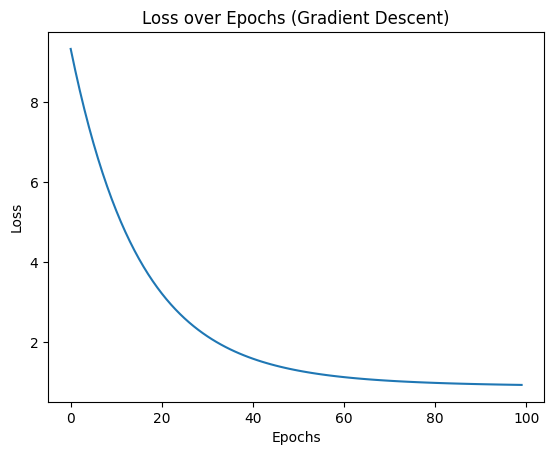

Final validation loss: 0.9301124112228862


In [421]:
#training the model

dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

X = df[["sepal length (cm)", "sepal width (cm)"]].values
y = df[["petal length (cm)", "petal width (cm)"]].values

mulp_model = MultipleLinearRegression()

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.1, random_state=42)

mulp_model.fit(X_train4, y_train4, batch_size=32, regularization=0, max_epochs=100, patience=3)

# Classification

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

class LogisticRegression:
    """
    Logistic Regression using softmax activation for multi-class classification.
    """
    def __init__(self, learning_rate=0.1, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None

    def softmax(self, z):
        """Compute softmax probabilities for multi-class classification."""
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Prevents overflow
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        """Train the logistic regression model using batch gradient descent."""
        num_samples, num_features = X.shape
        num_classes = np.unique(y).size  # Number of unique class labels
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros((1, num_classes))

        # One-hot encode target labels
        y_one_hot = np.eye(num_classes)[y]

        for epoch in range(self.max_epochs):
            logits = X @ self.weights + self.bias  # Compute logits
            predictions = self.softmax(logits)  # Convert to probabilities
            errors = predictions - y_one_hot  # Compute the error

            # Compute gradients
            gradient_weights = (X.T @ errors) / num_samples
            gradient_bias = np.sum(errors, axis=0, keepdims=True) / num_samples

            # Update model parameters using gradient descent
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        """Predict class labels for input data."""
        logits = X @ self.weights + self.bias
        return np.argmax(self.softmax(logits), axis=1)

    def save(self, filepath):
        """Save model parameters."""
        np.savez(filepath, w=self.weights, b=self.bias)

    def load(self, filepath):
        """Load model parameters."""
        data = np.load(filepath)
        self.weights = data['w']
        self.bias = data['b']




In [435]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
#from logistic_regression import LogisticRegression

def train_and_save(X, y, feature_name, save_path):
    """
    Train a logistic regression model on the given feature set and save the trained model.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Save trained model
    model.save(save_path)

    # Compute model accuracy
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"Training Accuracy ({feature_name}): {accuracy:.2f}")

    # Plot decision boundary if the feature set is 2D
    if X.shape[1] == 2:
        plt.figure(figsize=(8, 6))
        plot_decision_regions(X_test, y_test, clf=model)
        plt.xlabel(feature_name.split('/')[0] + " (cm)")
        plt.ylabel(feature_name.split('/')[1] + " (cm)")
        plt.title(f"Decision Boundary: {feature_name}")
        plt.legend(["Setosa", "Versicolor", "Virginica"])
        plt.show()

def evaluate_model(save_path, X_test, y_test, feature_name):
    """
    Load a trained logistic regression model and evaluate its accuracy on test data.
    """
    model = LogisticRegression()
    model.load(save_path)

    # Predict and compute accuracy
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"Evaluation Accuracy ({feature_name}): {accuracy:.2f}")


## train.classifier1.py

Training Accuracy (Petal Length/Width): 0.97


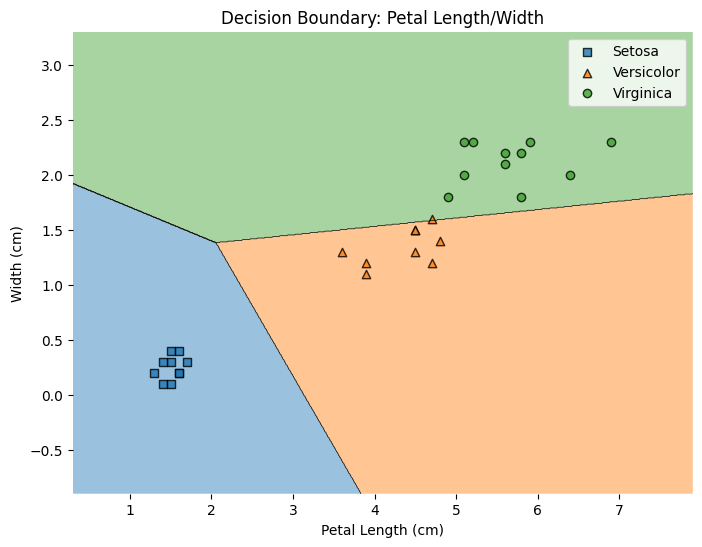

In [436]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_petal = df.iloc[:, [2, 3]].values  # Petal length & width
y = iris.target

train_and_save(X_petal, y, "Petal Length/Width", "train_classifier1.npz")


## train.classifier2.py

Training Accuracy (Sepal Length/Width): 0.90


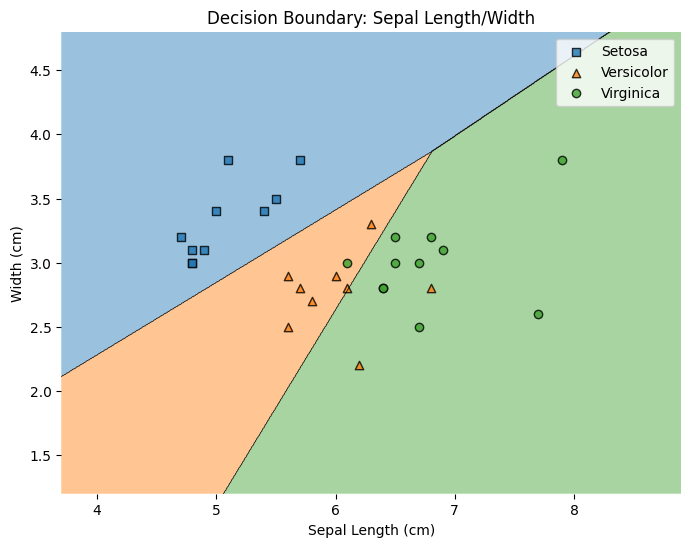

In [437]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_sepal = df.iloc[:, [0, 1]].values  # Sepal length & width
y = iris.target

train_and_save(X_sepal, y, "Sepal Length/Width", "train_classifier2.npz")


## train_classifier3.py

In [438]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_all = df.values  # All features
y = iris.target

train_and_save(X_all, y, "All Features", "train_classifier3.npz")


Training Accuracy (All Features): 1.00


## eval_classifier1.py

In [439]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_petal = df.iloc[:, [2, 3]].values  # Petal length & width
y = iris.target

evaluate_model("train_classifier1.npz", X_petal, y, "Petal Length/Width")


Evaluation Accuracy (Petal Length/Width): 0.95


## eval_classifier2.py

In [440]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_sepal = df.iloc[:, [0, 1]].values  # Sepal length & width
y = iris.target

evaluate_model("train_classifier2.npz", X_sepal, y, "Sepal Length/Width")


Evaluation Accuracy (Sepal Length/Width): 0.81


## eval.classifier3.py

In [441]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_all = df.values  # All features
y = iris.target

evaluate_model("train_classifier3.npz", X_all, y, "All Features")


Evaluation Accuracy (All Features): 0.98


# Questions

## Linear Regression - What are the pros and cons of using the normal equation to solve for the weights in linear regression as opposed to using gradient descent?

---


### The Normal Equation gives an exact solution without needing iterations, making it fast and efficient for small datasets. However, it requires matrix inversion, which is computationally expensive and impractical for large datasets. Gradient Descent, on the other hand, is an iterative approach that works well for large datasets since it updates weights gradually and avoids expensive calculations. The downside is that it requires tuning a learning rate and may take longer to converge. In short, we can use the Normal Equation for small datasets and Gradient Descent for large ones where efficiency and scalability matter.

## Logistic Regression - Why is the softmax function used in multi-class logistic regression (Hint: the model itself produces logits)?

---
### The softmax function is used in multi-class logistic regression because the model gives raw scores (logits) that don’t mean much on their own. Softmax fixes this by turning those scores into probabilities that add up to 1, making it easy to see which class is the most likely. It does this by exponentiating each score and dividing by the total, so higher scores get higher probabilities. Without softmax, the model's outputs wouldn’t be useful for picking a class. Basically, softmax makes the model’s predictions actually make sense as probabilities.
